In [1]:
import numpy as np
import seaborn as sns
import panel as pn
from scipy.stats import beta as beta_dist
from matplotlib.figure import Figure

In [2]:
pn.extension()

In [3]:
pn.pane.Markdown(r"""
# Generating Random Variables for a Probability Distribution<br>
Sometimes, we can use "direct" methods to generate random variables for a probability distribution.<br><br> 
For a direct method, we can generate the desired random variable $$Y$$ using a closed form function $$Y = g(U)$$ where $$U \sim Uniform(0,1)$$. 
The function $$g$$ makes use of the inverse Probability Integral Transform. (Recall that the Probability Integral Transform converts any distribution to uniform.)
<br><br>
However, if the transformation cannot be accomplished with the inverse PIT, other, "indirect" methods may be used. 

## Generating Beta Random Variables<br>
One example for which a direct transformation does not exist is the beta distribution whenever its parameters $$\alpha$$ and $$\beta$$ are nonintegers.<br><br>
Consider the pdf of $$Y \sim Beta(a, b)$$ with the parameters a and b chosen to be arbitrary positive nonintegers. <br><br>
Let $$U, V \sim Uniform(0,1)$$. 
We will place the beta distribution within a rectangle with side lengths 1 and $$c = max_{Y}f_{Y}(y)$$.<br><br>
Choose values for the parameters of the beta distribution. 
""", style={'font-size': '12pt'}, width = 800)

Markdown(str, style={'font-size': '12pt'}, width=800)

Column
    [0] FloatSlider(end=10, name='alpha', start=2, value=2.7)
    [1] FloatSlider(end=10, name='beta', start=2, value=6.3)
    [2] ParamFunction(function, _pane=Matplotlib)
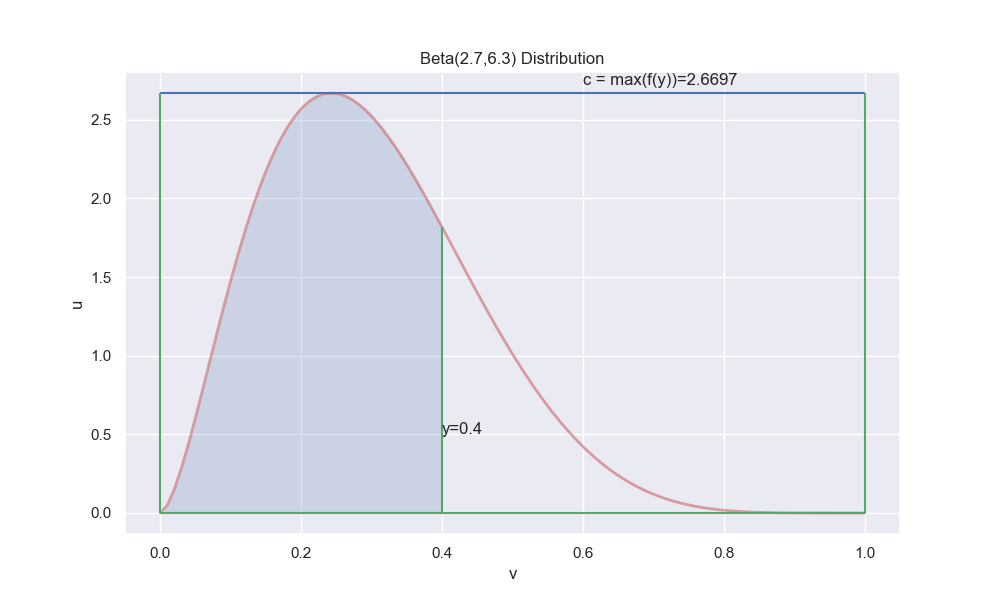

In [4]:
sns.set()

def plot1(data):
    a, b = data['params']
    c = data['c']
    fig = Figure(figsize=(10,6))
    ax = fig.add_subplot()
    ax.plot(*data['beta1'], 'r-', lw=2, alpha=0.5, label=f'beta({a},{b})')
    ax.hlines(0, color='g', linestyle='-', xmin=0, xmax=1)
    ax.hlines(c, color='b', linestyle='-', xmin=0, xmax=1, label=f'c={c:.4f}')
    ax.vlines([0,1], color='g', linestyle='-', ymin=0, ymax=c)
    ax.vlines(0.4, color='g', linestyle='-', ymin=0, ymax= data['vline_max'], label='y=0.4')
    ax.fill_between(*data['beta2'], alpha=0.2)
    ax.annotate(f'c = max(f(y))={c:.4f}', xy=(0.6, c+0.05))
    ax.annotate('y=0.4', xy=(0.4, 0.5))
    ax.set_xlabel('v')
    ax.set_ylabel('u')
    ax.set_title(f'Beta({a},{b}) Distribution')
    return pn.pane.Matplotlib(fig)

def get_dist(a, b, view_plot = plot1):
    params = [a, b]
    start = beta_dist.ppf(0, a, b)
    end = beta_dist.ppf(1, a, b)
    x1 = np.linspace(start, end, 100)
    x2 = np.linspace(0, 0.4, 100)
    mode = (a-1) / (a+b-2)
    c = beta_dist.pdf(mode, a, b, loc=0, scale=1)
    dist1 = beta_dist.pdf(x1, a, b, loc=0, scale=1)
    dist2 = beta_dist.pdf(x2, a, b, loc=0, scale=1)
    vline_max = beta_dist.pdf(0.4, a, b, loc=0, scale=1)
    plot_data = {
        'params': params,
        'beta1': [x1, dist1],
        'beta2': [x2, dist2],
        'c': c,
        'vline_max': vline_max
    }
    return view_plot(plot_data)

alpha = pn.widgets.FloatSlider(start=2, end=10, step=0.1, value = 2.7, name='alpha')
beta = pn.widgets.FloatSlider(start=2, end=10, step=0.1, value = 6.3, name='beta')
interactive1 = pn.bind(get_dist, a = alpha, b = beta)
dist = pn.Column(alpha, beta, interactive1)
dist

In [6]:
pn.pane.Markdown(r"""
For an arbitrary y value (shown as y=0.4 in the figure), the area of the shaded region is<br><br>
$$\Large P \bigg(V \leq y, U \leq \frac{1}{c} f_{Y}(V) \bigg) = \int_{0}^{y} \int_0^{\frac{f_{Y}(v)}{c}} \mathrm{d}u \mathrm{d}v = \frac{1}{c} \int_0^y f_{Y}(v) \mathrm{d}v = \frac{1}{c} P(Y \leq y)$$ <br><br>
From the above expression, observe that whenever y=1, $P(V \leq y) = 1$.<br><br>
It follows directly that $$\Large \frac{1}{c} = P \bigg(U \leq \frac{1}{c} f_{Y}(V) \bigg)$$ <br><br>
And we have $$\Large P(V \leq y) = \frac{P \bigg(V \leq y, U \leq \frac{1}{c} f_{Y}(V)\bigg)}{P \bigg(U \leq \frac{1}{c} f_{Y}(V) \bigg)} =P\bigg(V\leq y \mid U \leq \frac{1}{c} f_{Y}(V)\bigg)$$ <br><br>
This suggests that we can let y = v, provided that the corresponding value of u is under the density.<br><br>
To generate $$Y \sim Beta(\alpha,\beta)$$:<br>
1. Generate $$(U,V)$$ independent $$Uniform(0,1)$$.<br>
2. If $$U < \frac{1}{c}f_{y}(V)$$, set $$Y=V$$. Otherwise return to step 1.<br><br>
Now, we can compare the histogram of the generated Y variables with the beta density function.<br>
""", style={'font-size': '12pt'}, width = 800)

Markdown(str, style={'font-size': '12pt'}, width=800)

Column
    [0] IntSlider(end=5000, name='Number of Generated V..., start=10, step=50, value=10)
    [1] FloatSlider(end=10, name='alpha', start=2, value=2.7)
    [2] FloatSlider(end=10, name='beta', start=2, value=6.3)
    [3] ParamFunction(function, _pane=Matplotlib)
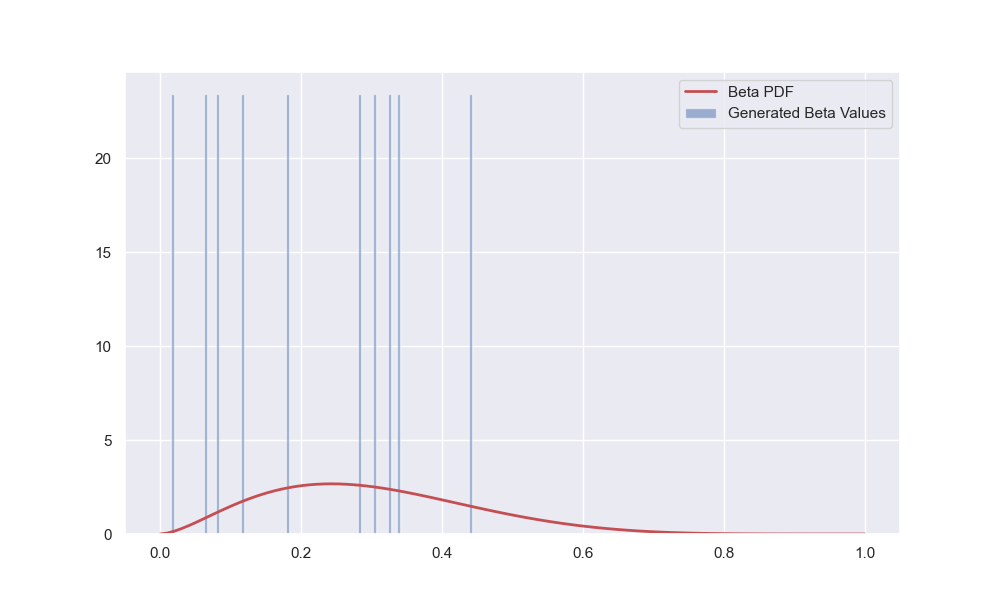

In [7]:
sns.set()

def plot2(data):
    fig = Figure(figsize=(10,6))
    ax = fig.add_subplot()
    ax.plot(*data['beta'], 'r-', lw=2, alpha=1, label='Beta PDF')
    ax.hist(data['alg_output'], bins=100, density=True, alpha=0.5, label='Generated Beta Values')
#   sns.kdeplot(data['alg_output'], ax=ax, shade=True, label='Generated Values')
    ax.legend()
    return pn.pane.Matplotlib(fig)
    

def gen(n, a, b, view_plot = plot2):
    mode = (a-1) / (a+b-2)
    c = beta_dist.pdf(mode, a, b, loc=0, scale=1)
    global output
    output = np.zeros(n)
    i = 0
    while i < n:
        U = np.random.uniform(size = 1)
        V = np.random.uniform(size = 1)
        if U < 1/c * beta_dist.pdf(V, a, b, loc=0, scale=1):
            output[i] = V
            i += 1
    x = np.linspace(beta_dist.ppf(0, a, b), beta_dist.ppf(1, a, b), 100)
    dist = beta_dist.pdf(x, a, b, loc=0, scale=1)
    plot_data = {
        'params': [a, b], 
        'beta': [x, dist],
        'alg_output': output,
    }
    
    return view_plot(plot_data)
    
num_vars = pn.widgets.IntSlider(start=10, end=5000, step=50, value=10, name='Number of Generated Variables')
alpha = pn.widgets.FloatSlider(start=2, end=10, step=0.1, value = 2.7, name='alpha')
beta = pn.widgets.FloatSlider(start=2, end=10, step=0.1, value = 6.3, name='beta')
interactive2 = pn.bind(gen, n = num_vars, a = alpha, b = beta)
dist = pn.Column(num_vars, alpha, beta, interactive2)
dist

#### Reference: Casella, Berger (2002) Section 5.6

def stats(n, a, b):
    dmean = beta_dist.mean(a, b, loc=0, scale=1)
    smean = np.mean(output)
    dvar = beta_dist.var(a, b, loc=0, scale=1)
    svar = np.var(output)
    note1 = 'Observe that by increasing the number of variables generated, we obtain a sample that more closely resembles the beta function. This is an expected result by the Central Limit Theorem.'
    note2 = f'The expected value of the beta distribution is {dmean:.4f}'
    note3 = f'The sample mean of the generated beta variables is {smean:.4f}' 
    note4 = f'The variance of the beta distribution is {dvar:.4f}' 
    note5 = f'The sample variance of the generated beta variables is {svar:.4f}'
    return pn.pane('\n'.join([note1, note2, note3, note4, note5]))